<p style="color:#153462; 
          font-weight: bold; 
          font-size: 30px; 
          font-family: Gill Sans, sans-serif; 
          text-align: center;">
          Recurrent Neural Networks</p>

### Neural Network

<p style="text-align: justify; text-justify: inter-word;">
   <font size=3>
       A neural network follows a process of pattern matching through the connection of many very simple functions to create one powerful function. It is very loosely based on connected neurons in the brain.
   </font>
</p>

<img src="images/neural_network.png" alt="neural_network" style="width: 600px;"/>

<p style="text-align: justify; text-justify: inter-word;">
   <font size=3>
       In the above image, <i>Simple Neural Network</i> is also called <i>shallow, fully connected, feed
       forward neural network</i>.<br>
       we will try understand each termed used in the name:<br>
       <i>Shallow</i>: Because there is only one hidden layer <br>
       <i>Fully Connected</i>: Each node connected to everynode in the layer on either side of it.<br>
       <i>Feed Forward</i>: The information flow directly from the input layer to the ouput layer without
       ever moving backword
   </font>
</p>

### Recurrent Neural Network

<p style="text-align: justify; text-justify: inter-word;">
   <font size=3>
       Pattern matching through the connection of many very simple functions to create one very powerful function.
       This function has an understanding of the data's sequential nature(Using feedback loops that form a sense 
       of memory). Below image will give the basic idea about it.
   </font>
</p>

<img src="images/sequence_learning.png" alt="sequence_learning" style="width: 600px;"/>

### Loading and Tokenizing the Data

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import keras.backend as K
from keras.layers import Dense, Embedding, LSTM
from keras.models import Sequential

In [39]:
data_df = pd.read_csv(r"D:\Artificial_Intelligence\nat_lang_proc\data\spam.csv", 
                          encoding="latin-1")
data_df = data_df.drop(labels=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
data_df.columns = ["label", "text"]
labels = np.where(data_df["label"] == "spam", 1, 0)

In [40]:
data_df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [41]:
labels

array([0, 0, 1, ..., 0, 0, 0])

In [42]:
X_train, X_test, y_train, y_test = train_test_split(data_df["text"],
                                                    labels,
                                                    test_size=0.20,
                                                    random_state=42)

In [47]:
# Initializing and fitting the tokenizer
tokenizer = Tokenizer()
# The fit_on_texts() method is a function of the Tokenizer class that is used
# to generate the word index based on the corpus of text.
tokenizer.fit_on_texts(X_train)

In [48]:
# index word tokenizer
len(tokenizer.index_word)

7954

In [49]:
# Use the tokenizer to transform the text messages in the training and test sets to sequence
x_train_seq = tokenizer.texts_to_sequences(X_train)
x_test_seq = tokenizer.texts_to_sequences(X_test)

In [50]:
len(x_train_seq)

4457

In [51]:
# First messages sequence list
x_train_seq[0]

[38,
 30,
 8,
 5,
 273,
 1989,
 81,
 116,
 26,
 11,
 1656,
 322,
 10,
 53,
 18,
 299,
 30,
 349,
 1990]

In [52]:
# Each and every text message length might be different. This cause problem while
# traing rrn model. Below function helps to pad the text
x_train_seq_padded = pad_sequences(x_train_seq, 50)
x_test_seq_padded = pad_sequences(x_test_seq, 50)

In [53]:
x_train_seq_padded[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,   38,   30,
          8,    5,  273, 1989,   81,  116,   26,   11, 1656,  322,   10,
         53,   18,  299,   30,  349, 1990])

### Model Training

<b>keras.backend.clip(a, a_min, a_max)</b><br>
where a is the array to be clipped, a_min is the minimum value, and a_max is the maximum value. The method returns a new array with the values of a clipped to the range between a_min and a_max. In this example, the values in the arr array that are less than 2 are set to 2, and the values greater than 4 are set to 4. The resulting array arr_clip contains the clipped values.

In [54]:
K.clip([1, 2, 5, 5, 4, 1], 2, 4)

<tf.Tensor: shape=(6,), dtype=int32, numpy=array([2, 2, 4, 4, 4, 2])>

<b>keras.backend.epsilon()</b> is a function in the Keras backend module that returns a small positive constant. It is typically used in numerical computations involving division or logarithms, where a very small number is needed to prevent division by zero or taking the logarithm of zero, which can cause numerical instability.

In the case of 1e-8, the e-8 part means "times 10 to the power of negative 8". So 1e-8 is equivalent to 0.00000001 or 1/100000000. This is a very small number that is often used as a small positive constant in numerical computations, such as in the case of keras.backend.epsilon() that we discussed earlier.

Similarly, 1e-3 would be equivalent to 0.001 or 1/1000, and 1e+6 would be equivalent to 1000000 or 10^6.

In [55]:
epsilon = K.epsilon()
print(epsilon)

1e-07


In [61]:
# Model evaluation matrices
def recall_m(y_true, y_pred):
    """
    TP/(TP+FN)
    """
    # one instance called true positive when it is 1 in both y_true and y_pred
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives/(possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives/(predicted_positives + K.epsilon())
    return precision

In Keras, the <b>Sequential</b> model is a linear stack of layers that allows you to easily build and train deep learning models. It is a simple and convenient way to create a neural network where you can add one layer at a time, and each layer is connected to the previous one.

In Keras, <b>Embedding</b> is a layer that is commonly used in natural language processing (NLP) tasks to convert sequences of words into dense vectors of fixed size, which can be easily fed into a neural network. The Embedding layer essentially learns a low-dimensional representation (embedding) for each word in the vocabulary, where words that are semantically similar are represented by vectors that are close together in the embedding space.

In Keras, a <b>dense</b> layer is a type of neural network layer where each neuron in the layer receives input from all neurons in the previous layer, and then applies a transformation to produce an output that is passed to the next layer. This is also called a fully connected layer or a feedforward layer

In [65]:
model = Sequential()
# TODO: Need understand why +1 added
model.add(Embedding(input_dim=len(tokenizer.index_word)+1, output_dim=32))
# Look the text file in same directory for more inforamtion
model.add(LSTM(units=32, dropout=0, recurrent_dropout=0))
model.add(Dense(units=32, activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 32)          254560    
                                                                 
 lstm_3 (LSTM)               (None, 32)                8320      
                                                                 
 dense_6 (Dense)             (None, 32)                1056      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 263,969
Trainable params: 263,969
Non-trainable params: 0
_________________________________________________________________


In [66]:
# Compile the model. To know more about the compilation refer model_compile.txt file
model.compile(optimizer='adam',
              loss="binary_crossentropy",
              metrics=["accuracy", precision_m, recall_m])

In [67]:
history = model.fit(x=x_train_seq_padded,
                    y=y_train,
                    batch_size=32, # Training data batches, each batch has 32 sample,
                                   # It it know as iteration, in each iteration weights
                                   # will be updated.
                    epochs=10, # Entire training process repeated 10 times
                    validation_data=(x_test_seq_padded, y_test))

Epoch 1/10
140/140 [==============================] - 12s 49ms/step - loss: 0.2466 - accuracy: 0.9239 - precision_m: 0.4740 - recall_m: 0.3925 - val_loss: 0.0774 - val_accuracy: 0.9776 - val_precision_m: 0.9571 - val_recall_m: 0.8864
Epoch 2/10
140/140 [==============================] - 4s 28ms/step - loss: 0.0302 - accuracy: 0.9906 - precision_m: 0.9626 - recall_m: 0.9469 - val_loss: 0.0531 - val_accuracy: 0.9839 - val_precision_m: 0.9905 - val_recall_m: 0.9002
Epoch 3/10
140/140 [==============================] - 4s 27ms/step - loss: 0.0097 - accuracy: 0.9978 - precision_m: 0.9738 - recall_m: 0.9683 - val_loss: 0.0711 - val_accuracy: 0.9812 - val_precision_m: 0.9905 - val_recall_m: 0.8692
Epoch 4/10
140/140 [==============================] - 4s 28ms/step - loss: 0.0032 - accuracy: 0.9989 - precision_m: 0.9893 - recall_m: 0.9884 - val_loss: 0.0736 - val_accuracy: 0.9830 - val_precision_m: 0.9952 - val_recall_m: 0.8764
Epoch 5/10
140/140 [==============================] - 4s 28ms/step 

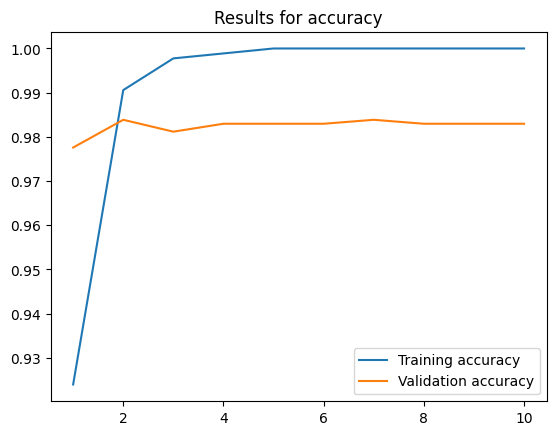

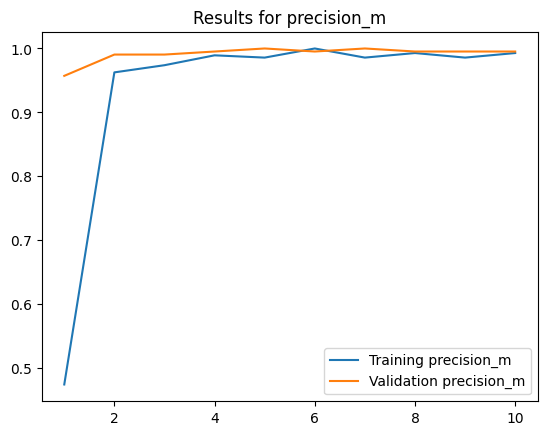

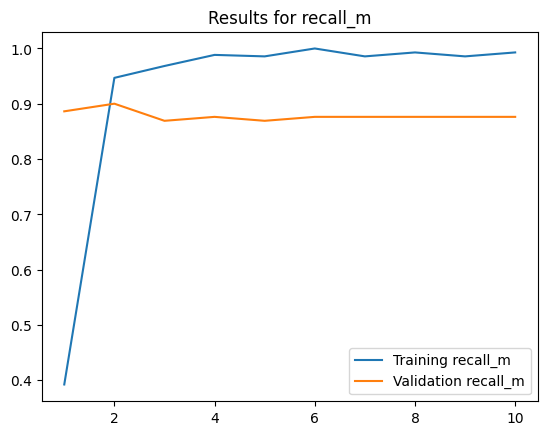

In [79]:
# Checking how accuracy, precision and recall changing over the epchos
import matplotlib.pyplot as plt

for i in ["accuracy", "precision_m", "recall_m"]:
    acc = history.history[i]
    val_acc = history.history[f"val_{i}"]
    epochs = range(1, len(acc) + 1)
    
    plt.figure()
    plt.plot(epochs, acc, label=f"Training {i}")
    plt.plot(epochs, val_acc, label=f"Validation {i}")
    plt.title(f"Results for {i}")
    plt.legend()
    plt.show()

So from above graph we can understand that our model learned a lot around in 5 epoc itself